# Lesson 13.2 模型拟合度与欠拟合模型的结构调整策略

## 一、模型拟合度概念介绍与实验

### 1.测试集的“不可知”悖论

- 根据测试集调整模型的话，测试集就变成了训练集
- 测试集是严格不能带入训练的数据集，在实际建模过程中我们可以先把测试集切分出来，然后“假装这个数据集不存在”，在剩余的数据集中划分**训练集和验证集**，把训练集带入模型进行运算，再把验证集放在训练好的模型中进行运行，观测运行结果，再进行模型调整。

### 2.模型拟合度概念与实验

&emsp;&emsp;模型如果能很好的捕捉总体规律，就能够有较好的优化问题中，最基础的也是最核心的问题，就是关于模型拟合程度的探讨与未知数据的预测效果。但限制模型捕捉总体规律的原因主要有两点：
- 其一，样本数据能否很好的反应总体规律      
&emsp;&emsp;如果样本数据本身无法很好的反应总体规律，那建模的过程就算捕捉到了规律可能也无法适用于未知数据。 
- 其二，样本数据能反应总体规律，但模型没有捕捉到     
&emsp;&emsp;如果数据能反应总体规律而模型效果不佳，则核心原因就在模型本身了。导致模型在测试集上效果不好的原因其实也主要有两点
  - 一是模型没捕捉到训练集上数据的规律，
  - 二则是模型过分捕捉训练集上的数据规律，导致模型捕获了大量训练集独有的、无法适用于总体的规律（局部规律），而测试集也是从总体中来，这些规律也不适用于测试集。

In [3]:
# 设计随机数种子
np.random.seed(123)

# 创建数据
n_dots = 20
x = np.linspace(0, 1, n_dots)                        # 从0到1，等宽排布的20个数
y = np.sqrt(x) + 0.2*np.random.rand(n_dots) - 0.1    

# 给定 X,y的关系，在加以干扰

In [2]:
np.random.rand(10)

array([0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338,
       0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612])

其中，x是一个0到1之间等距分布20个点组成的ndarray，$y=\sqrt{x}+r$，其中r是人为制造的随机噪声，在[-0.1,0.1]之间服从均匀分布。

然后我们借助numpy的polyfit函数来进行多项式拟合，polyfit函数会根据设置的多项式阶数，在给定数据的基础上利用最小二乘法进行拟合，并返回拟合后各阶系数。
- `polyfit(x,y,最高次)`
-  `np.poly1d(np.polyfit(x, y0, 2))`逆向构造多项式方程

In [4]:
y0 = x ** 2
np.polyfit(x, y0, 2)

# polyfit(x,y,最高次)

array([ 1.00000000e+00, -2.00019564e-18, -3.29090297e-17])

In [5]:
# 该系数可用ploy1d逆向构造多项式方程
p = np.poly1d(np.polyfit(x, y0, 2))
print(p)

   2
1 x - 2e-18 x - 3.291e-17


能够看到多项式结构基本和原多项式保持一致，此时生成的p对象相当于是一个多项式方程，可通计算输入参数的多项式输出结果

In [7]:
p(-1)

1.0

接下来，进行多项式拟合。分别利用1阶x多项式、3阶x多项式和10阶x多项式来拟合y。并利用图形观察多项式的拟合度，首先我们可定义一个辅助画图函数，方便后续我们将图形画于一张画布中，进而方便观察

In [9]:
# 
def plot_polynomial_fit(x, y, deg):
  
    p = np.poly1d(np.polyfit(x, y, deg))
    t = np.linspace(0, 1, 200)
    plt.plot(x, y, 'r.', t, p(t), '-', t, np.sqrt(t), 'r--')

#   其中，t为[0,1]中等距分布的100个点，
# 而p是deg参数决定的多项式回归拟合方程，p(t)即为拟合方程x输入t值时多项式输出结果
 

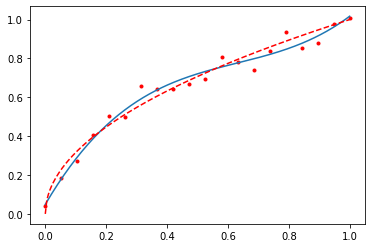

In [10]:
plot_polynomial_fit(x, y, 3)

# 点的分布就是真实值
# 拟合结果是蓝色，红色虚线是X和y的真实关系

<Figure size 3600x800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Under Fitting')

<AxesSubplot:>

Text(0.5, 1.0, 'Fitting')

<AxesSubplot:>

Text(0.5, 1.0, 'Over Fitting')

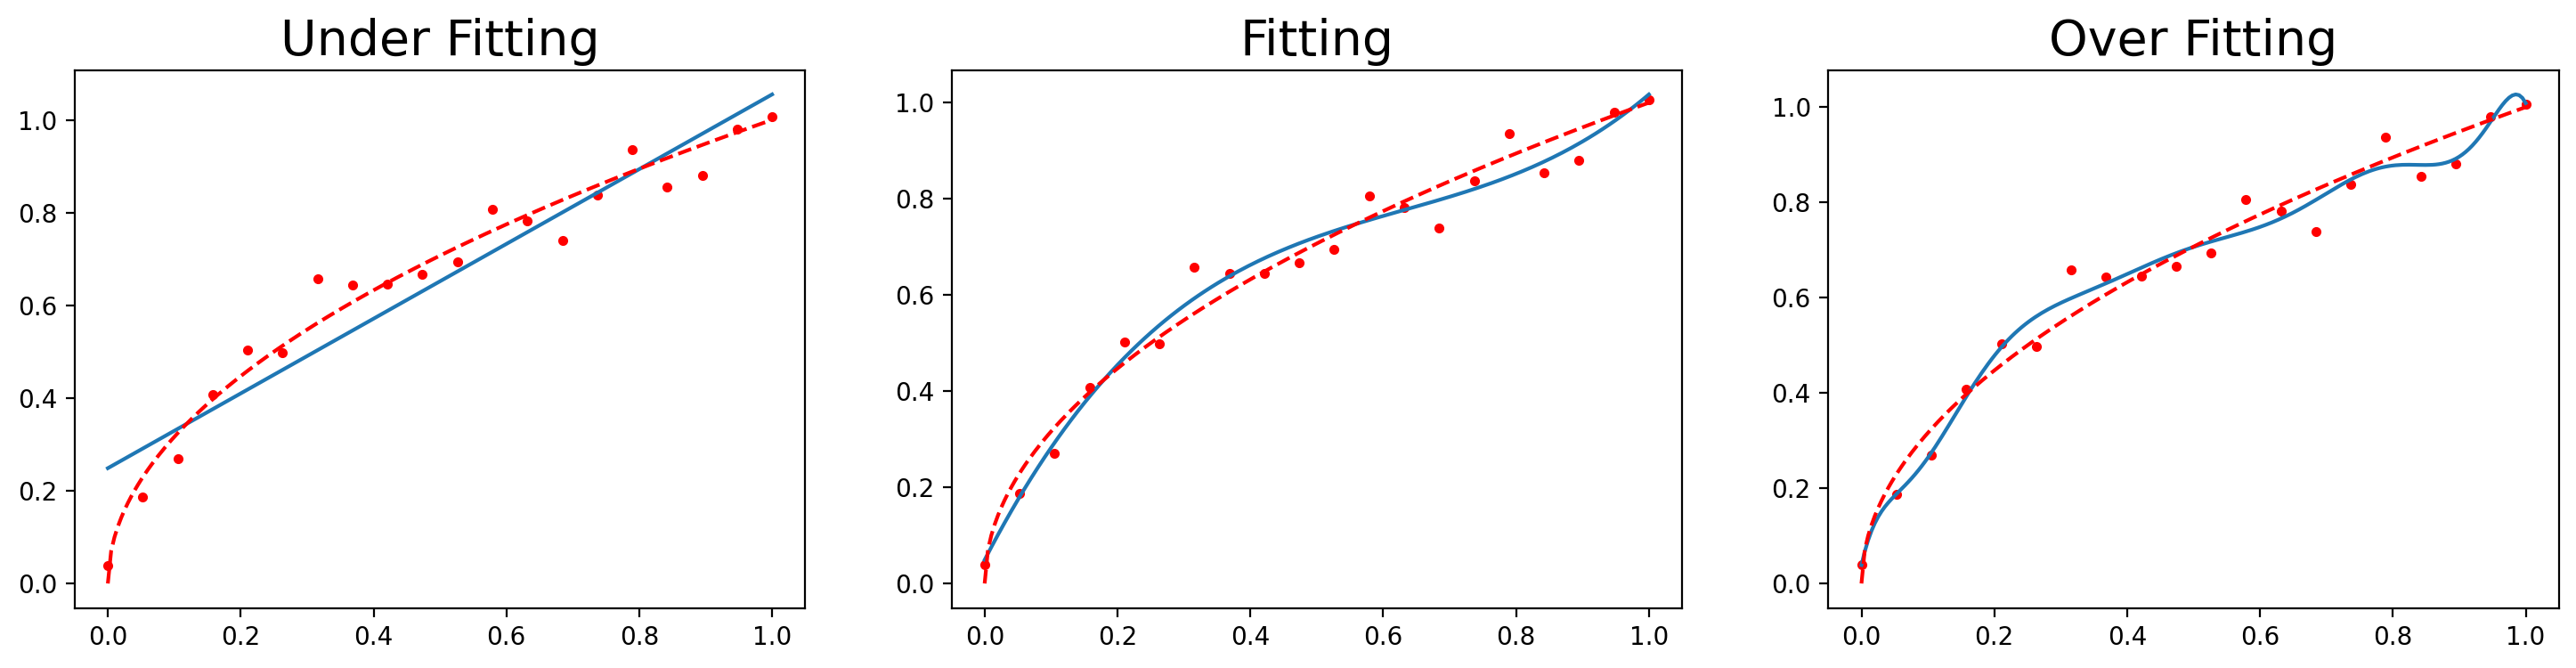

In [11]:
#————————————————————————将1阶拟合、3阶拟合和10阶拟合绘制在一张图中————————————————————————————
plt.figure(figsize=(18, 4), dpi=200)
titles = ['Under Fitting', 'Fitting', 'Over Fitting']

for index, deg in enumerate([1, 3, 10]):
    plt.subplot(1, 3, index + 1)
    plot_polynomial_fit(x, y, deg)
    plt.title(titles[index], fontsize=20)


# 一阶: 欠拟合 训练误差和泛化误差都很大
# 10阶：过拟合 训练误差很小，但是泛化误差很大

因此，我们有基本结论如下：      
- 模型欠拟合：训练集上误差较大
- 模型过拟合：训练集上误差较小，但测试集上误差较大

模型越复杂，越有能力捕捉训练集上的规律，因此如果模型欠拟合，我们可以通过提高模型复杂度来进一步捕捉规律，但同时也会面临模型过于复杂而导致过拟合的风险。

<img src="https://i.loli.net/2021/02/06/kSiX5adUTybOePf.jpg" alt="44" style="zoom:50%;" />

## 二、模型欠拟合实例

首先我们来讨论模型欠拟合时，通过提升模型复杂度提升模型效果的基本方法。当然，从神经网络整体模型结构来看，提升复杂度只有两种办法
- 一是修改激活函数，在神经元内部对加权求和汇总之后的值进行更加复杂的处
- 另一种方法则是添加隐藏层，包括隐藏层层数和每一层隐藏层的神经元个数。
  接下来我们通过一些列实验来查看相关效果。

&emsp;&emsp;还是多元线性回归的例子，如果是高次项方程，通过简单的线性网络拟合就会出现欠拟合的情


- 构建数据集  
创建一个数据满足$y = 2x_1^2 - x_2^2$方程的分布数组

<AxesSubplot:>

<AxesSubplot:>

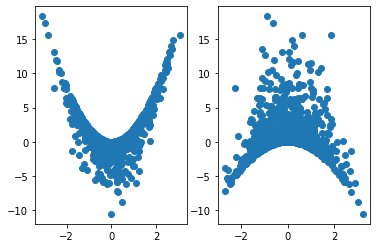

In [12]:
# 设置随机数种子
torch.manual_seed(420)  

# 创建最高项为2的多项式回归数据集
features, labels = tensorGenReg(w=[2, -1], bias=False, deg=2)

# 绘制图像查看数据分布
plt.subplot(121)
plt.scatter(features[:, 0], labels)
plt.subplot(122)
plt.scatter(features[:, 1], labels)

In [14]:
features

tensor([[-0.0070,  0.5044],
        [ 0.6704, -0.3829],
        [ 0.0302,  0.3826],
        ...,
        [-0.9164, -0.6087],
        [ 0.7815,  1.2865],
        [ 1.4819,  1.1390]])

In [15]:
# 进行数据集切分与加载
train_loader, test_loader = split_loader(features, labels)

- 训练模型  
  定义简单线性回归模型,没有设置激活函数, y = X*w

In [16]:
class LR_class(nn.Module):                                         # 没有激活函数
    def __init__(self, in_features=2, out_features=1):       # 定义模型的点线结构
        super(LR_class, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):                                    # 定义模型的正向传播规则
        out = self.linear(x)             
        return out

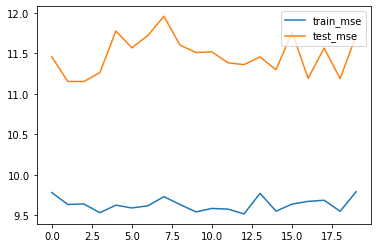

In [17]:
#————————————————————————————训练模型————————————————————————————
# 设置随机数种子
torch.manual_seed(420)  

# 实例化模型
LR = LR_class()

train_l = []           # 列表容器，存储训练误差
test_l = []            # 列表容器，存储测试误差

num_epochs = 20

# 执行循环
for epochs in range(num_epochs):
    fit(net = LR,
        criterion = nn.MSELoss(),
        optimizer = optim.SGD(LR.parameters(), lr = 0.03),
        batchdata = train_loader,
        epochs = epochs)
    train_l.append(mse_cal(train_loader, LR).detach().numpy())
    test_l.append(mse_cal(test_loader, LR).detach().numpy())
    
# 绘制图像，查看MSE变化情况
plt.plot(list(range(num_epochs)), train_l, label='train_mse')
plt.plot(list(range(num_epochs)), test_l, label='test_mse')
plt.legend(loc = 1)

# 对比此前线性回归的MSE，上述模型效果较差，且训练误差和测试误差均较大（此前是0.0001），
# 模型存在欠拟合情况，接下来考虑增加模型复杂程度

我们可以根据上述过程定义一个记录、对比模型训练过程训练集、测试集误差变化情况的函数，并写入模块文件。

In [ ]:
def model_train_test(model, 
                     train_data,
                     test_data,
                     num_epochs = 20, 
                     criterion = nn.MSELoss(), 
                     optimizer = optim.SGD, 
                     lr = 0.03, 
                     cla = False, 
                     eva = mse_cal):
    """模型误差测试函数：
    
    :param model_l：模型
    :param train_data：训练数据
    :param test_data: 测试数据   
    :param num_epochs：迭代轮数
    :param criterion: 损失函数
    :param lr: 学习率
    :param cla: 是否是分类模型
    :return：MSE列表
    """
    
    # 模型评估指标列表
    train_l = []
    test_l = []
    # 模型训练过程
    for epochs in range(num_epochs):
        fit(net = model, 
            criterion = criterion, 
            optimizer = optimizer(model.parameters(), lr = lr), 
            batchdata = train_data, 
            epochs = epochs, 
            cla = cla)
        train_l.append(eva(train_data, model).detach())
        test_l.append(eva(test_data, model).detach())
    return train_l, test_l

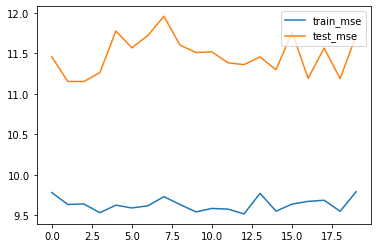

In [18]:
#————————————————————————————测试模型效果————————————————————————————

# 设置随机数种子
torch.manual_seed(420)  

# 实例化模型
LR = LR_class()

# 模型训练
train_l, test_l = model_train_test(LR, 
                                   train_loader,
                                   test_loader,
                                   num_epochs = 20, 
                                   criterion = nn.MSELoss(), 
                                   optimizer = optim.SGD, 
                                   lr = 0.03, 
                                   cla = False, 
                                   eva = mse_cal)

# 绘制图像，查看MSE变化情况
plt.plot(list(range(num_epochs)), train_l, label='train_mse')
plt.plot(list(range(num_epochs)), test_l, label='test_mse')
plt.legend(loc = 1)

In [22]:
#————————————————————提升模型复杂度：增加神经网络的层数——————————————————
class LR_class1(nn.Module):
    def __init__(self, in_features=2, n_hidden=4, out_features=1):       # 此处隐藏层设置四个激活函数
        super(LR_class1, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden)
        self.linear2 = nn.Linear(n_hidden,out_features)

    def forward(self, x):                                    
        z1 = self.linear1(x)
        out = self.linear2(z1)             
        return out    

#这里我们构建了一个两层都是线性层的神经网络，
# 并且没有加入激活函数。

In [23]:
# 设置随机数种子
torch.manual_seed(420)  

# 实例化模型
LR1 = LR_class1()

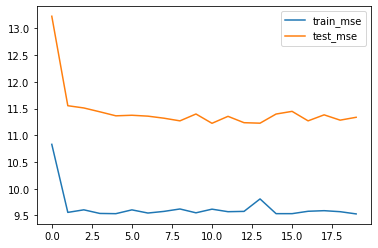

In [24]:
# 设置随机数种子
torch.manual_seed(420)  

# 实例化模型
LR1 = LR_class1()

# 模型训练
train_l, test_l = model_train_test(LR1, 
                                   train_loader,
                                   test_loader,
                                   num_epochs = 20, 
                                   criterion = nn.MSELoss(), 
                                   optimizer = optim.SGD, 
                                   lr = 0.03, 
                                   cla = False, 
                                   eva = mse_cal)

# 绘制图像，查看MSE变化情况
plt.plot(list(range(num_epochs)), train_l, label='train_mse')
plt.plot(list(range(num_epochs)), test_l, label='test_mse')
plt.legend(loc = 1)


# 我们发现，结果没有显著提升，但模型稳定性却有所提升
# 平稳性比较好的话，可信度比较高

对于叠加线性层的神经网络模型来说，由于模型只是对数据仿射变换，**因此并不能满足拟合高次项的目的**。

也就是说，在增加模型复杂度的过程中，首先需要激活函数的配合，然后再是增加模型的层数和每层的神经元个数



## 三、激活函数性能比较

### 1.常用激活函数对比

输出层的激活函数和隐藏层的激活函数应该分开对待
- 隐藏层的激活函数是为了对数据进行非线性变换
- 输出层的激活函数一般都是为了满足某种特定的输出结果所设计的，
  - 如softmax、Sigmoid等
  - 进行回归类问题实验，在输出层加入激活函数反而会影响输出结果。

- 创建模型类
 <center><img src="https://i.loli.net/2021/02/26/fOKePkACV54Fya9.jpg" alt="66" style="zoom:40%;" />

In [25]:
#————————————————————————————3个激活函数+不加激活函数————————————————————————————
# 只有隐藏层的激活函数有区别

# Sigmoid激活函数
class Sigmoid_class1(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden=4, out_features=1, bias = True):       
        super(Sigmoid_class1, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden, bias=bias)
        self.linear2 = nn.Linear(n_hidden, out_features, bias=bias)
        
    def forward(self, x):                                   
        z1 = self.linear1(x)
        p1 = torch.sigmoid(z1)       # 区别              
        out = self.linear2(p1)
        return out

# tanh激活函数
class tanh_class1(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden=4, out_features=1, bias = True):       
        super(tanh_class1, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden, bias=bias)
        self.linear2 = nn.Linear(n_hidden, out_features, bias=bias)
        
    def forward(self, x):                                   
        z1 = self.linear1(x)
        p1 = torch.tanh(z1)                   
        out = self.linear2(p1)
        return out

# ReLU激活函数
class ReLU_class1(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden=4, out_features=1, bias = True):       
        super(ReLU_class1, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden, bias=bias)
        self.linear2 = nn.Linear(n_hidden, out_features, bias=bias)
        
    def forward(self, x):                                   
        z1 = self.linear1(x)
        p1 = torch.relu(z1)                  
        out = self.linear2(p1)
        return out



> 上述三个激活函数还能使用F.方法，但推荐使用torch.方法执行。

In [26]:
t = torch.randn(5)
t

tensor([-1.3191, -1.2474,  1.8058,  1.4594, -0.1661])

In [27]:
F.relu(t)

torch.relu(t)

# 推荐使用torch.方法

tensor([0.0000, 0.0000, 1.8058, 1.4594, 0.0000])

tensor([0.0000, 0.0000, 1.8058, 1.4594, 0.0000])

In [28]:
#————————————————————————————实例化模型————————————————————————————
torch.manual_seed(420)  

LR1 = LR_class1()
sigmoid_model1 = Sigmoid_class1()
tanh_model1 = tanh_class1()
relu_model1 = ReLU_class1()

model_l = [LR1, sigmoid_model1, tanh_model1, relu_model1]           # 将实例化后模型放在一个列表容器中
name_l = ['LR1', 'sigmoid_model1', 'tanh_model1', 'relu_model1']

In [29]:
#————————————————————————————定义核心参数————————————————————————————
num_epochs = 30
lr = 0.03

In [30]:
#——————————————————————定义训练集、测试集MSE存储张量——————————————————————
mse_train = torch.zeros(len(model_l), num_epochs)
mse_test = torch.zeros(len(model_l), num_epochs)

In [31]:
#————————————————————————————训练模型————————————————————————————
# [LR1, sigmoid_model1, tanh_model1, relu_model1]  对4种激活函数都进行训练 

for epochs in range(num_epochs):
    for i, model in enumerate(model_l):
        fit(net = model, 
            criterion = nn.MSELoss(), 
            optimizer = optim.SGD(model.parameters(), lr = lr), 
            batchdata = train_loader, 
            epochs = epochs)
        mse_train[i][epochs] = mse_cal(train_loader, model).detach()
        mse_test[i][epochs] = mse_cal(test_loader, model).detach()

In [32]:
mse_train
mse_test

tensor([[10.8300,  9.6960,  9.5622,  9.5223,  9.5458,  9.5954,  9.5359,  9.6136,
          9.5801,  9.5964,  9.6088,  9.5391,  9.5435,  9.6457,  9.5339,  9.6280,
          9.5463,  9.5790,  9.5291,  9.6231,  9.6323,  9.5592,  9.7235,  9.6189,
          9.6135,  9.5363,  9.6436,  9.5781,  9.5489,  9.5466],
        [10.7485,  9.6246,  9.2736,  7.1681,  4.2412,  3.0897,  2.8030,  2.6019,
          2.5310,  2.4331,  2.4021,  2.4125,  2.4407,  2.3779,  2.3087,  2.5533,
          2.3416,  2.3221,  2.6079,  2.3055,  2.3146,  2.3081,  2.3664,  3.1914,
          2.2998,  2.4680,  2.2942,  2.6507,  2.3046,  2.4291],
        [10.7273,  9.0404,  6.0416,  5.0775,  4.6106,  4.4453,  4.3490,  4.7661,
          4.3492,  4.2997,  4.2669,  4.3732,  4.2767,  4.2490,  4.4358,  4.3139,
          4.2618,  4.4504,  4.3120,  4.3259,  4.2744,  4.4678,  4.2618,  4.3907,
          4.2713,  4.2294,  4.2711,  4.2295,  4.2537,  4.2408],
        [10.2269,  1.5506,  0.6582,  0.6659,  0.3920,  0.3590,  0.3089,  0.3818

tensor([[13.2264, 11.4769, 11.3752, 11.3732, 11.2853, 11.2702, 11.2457, 11.5075,
         11.2162, 11.7994, 11.5239, 11.4593, 11.3358, 11.6676, 11.3245, 11.5025,
         11.3631, 11.2606, 11.2952, 11.7086, 11.7071, 11.2788, 11.7602, 11.4373,
         11.1840, 11.3217, 11.4141, 11.3705, 11.3440, 11.3679],
        [13.1832, 11.2691, 10.6894,  8.7440,  5.0175,  3.4692,  2.7936,  2.4461,
          2.3718,  2.0881,  2.0349,  2.0134,  2.0608,  1.9349,  1.8626,  2.1943,
          1.7982,  1.8370,  2.1317,  1.8005,  1.8485,  1.8082,  1.9161,  2.7955,
          1.8118,  2.0475,  1.7516,  2.2262,  1.7782,  2.0306],
        [12.6266, 10.7718,  7.4650,  6.6652,  5.8065,  5.9088,  5.7766,  6.0403,
          5.8673,  5.8220,  5.7869,  5.9660,  5.6660,  5.7603,  5.7065,  5.9467,
          5.6148,  5.8969,  5.6322,  5.8451,  5.7456,  5.6308,  5.6584,  6.0047,
          5.5412,  5.6194,  5.8680,  5.6615,  5.8319,  5.6611],
        [12.2868,  1.6156,  0.9103,  0.8671,  0.5498,  0.4631,  0.4497,  0.5996

In [36]:
num_epochs

30

Text(0.5, 1.0, 'mse_train')

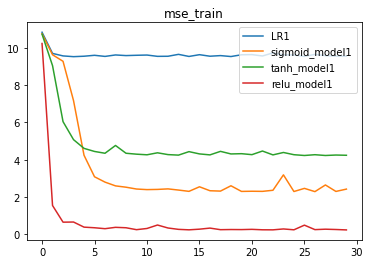

In [33]:
#————————————————————————————绘制图像观测结果————————————————————————————

# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), mse_train[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train')


# ReLU激活函数效果明显更好
# ReLU的收敛速度最快

- 激活函数性能简介与应用场景

ReLU激活函数是目前使用面最广、效果也相对更好的一种激活函数，但这并不代表tanh和Sigmoid激活函数就没有应用场景（比如RNN、LSTM模型仍然偏爱tanh和Siamoid）。

In [45]:
#————————————————————————————封装上述函数————————————————————————————
def model_comparison(model_l, 
                     name_l, 
                     train_data,
                     test_data,
                     num_epochs = 20, 
                     criterion = nn.MSELoss(), 
                     optimizer = optim.SGD, 
                     lr = 0.03, 
                     cla = False, 
                     eva = mse_cal):
    """模型对比函数：
    
    :param model_l：模型序列
    :param name_l：模型名称序列
    :param train_data：训练数据
    :param test_data：测试数据    
    :param num_epochs：迭代轮数
    :param criterion: 损失函数
    :param lr: 学习率
    :param cla: 是否是分类模型
    :return：MSE张量矩阵 
    """
    # 模型评估指标矩阵
    train_l = torch.zeros(len(model_l), num_epochs)
    test_l = torch.zeros(len(model_l), num_epochs)
    # 模型训练过程
    for epochs in range(num_epochs):
        for i, model in enumerate(model_l):
            fit(net = model, 
                criterion = criterion, 
                optimizer = optimizer(model.parameters(), lr = lr), 
                batchdata = train_data, 
                epochs = epochs, 
                cla = cla)
            train_l[i][epochs] = eva(train_data, model).detach()
            test_l[i][epochs] = eva(test_data, model).detach()
    return train_l, test_l


## 四、构建复杂神经网络

我们尝试增加模型复杂度，也就是添加隐藏层来构建更加复杂的神经网络模型。

### 1.ReLU激活函数叠加

&emsp;&emsp;首先是ReLU激活函数的叠加，那么我们考虑添加几层隐藏层并考虑在隐藏层中使用ReLU函数，也就是所谓的添加ReLU层。此处我们在ReLU_class1的基础上创建ReLU_class2结构如下：

- 输入层2应该为隐藏层2
<img src="https://i.loli.net/2021/02/08/qBxbuJfQlURjG8N.jpg" alt="51" style="zoom:40%;" />

In [46]:
class ReLU_class2(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden_1=4, n_hidden_2=4, out_features=1, bias=True):       
        super(ReLU_class2, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden_1, bias=bias)
        self.linear2 = nn.Linear(n_hidden_1, n_hidden_2, bias=bias)
        self.linear3 = nn.Linear(n_hidden_2, out_features, bias=bias)
        
    def forward(self, x):                                   
        z1 = self.linear1(x)
        p1 = torch.relu(z1)
        z2 = self.linear2(p1)
        p2 = torch.relu(z2)
        out = self.linear3(p2)
        return out

In [47]:
#————————————————————借助model_comparison函数进行模型性能测试—————————————————————

# 创建随机数种子
torch.manual_seed(24)  

# 实例化模型
relu_model1 = ReLU_class1()
relu_model2 = ReLU_class2()

# 模型列表容器
model_l = [relu_model1, relu_model2]           
name_l = ['relu_model1', 'relu_model2']

# 核心参数
num_epochs = 20
lr = 0.03


In [48]:

train_l, test_l = model_comparison(model_l = model_l, 
                                   name_l = name_l, 
                                   train_data = train_loader, 
                                   test_data = test_loader,
                                   num_epochs = num_epochs, 
                                   criterion = nn.MSELoss(), 
                                   optimizer = optim.SGD, 
                                   lr = 0.03, 
                                   cla = False, 
                                   eva = mse_cal)

Text(0.5, 1.0, 'mse_train')

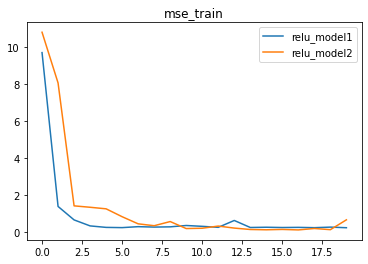

In [49]:
# 两个模型的训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_train')

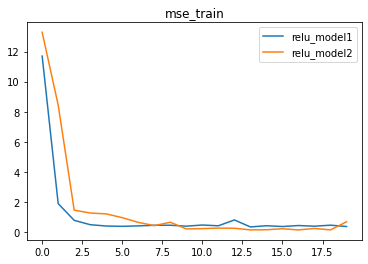

In [50]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train')

# 我们发现，模型效果并没有明显提升，
# 反而出现了更多的波动，迭代收敛速度也有所下降。

In [51]:
#————————————————————————————继续添加隐藏层————————————————————————————
# 设置随机数种子
torch.manual_seed(420)  

# 创建最高项为2的多项式回归数据集
features, labels = tensorGenReg(w=[2, -1], bias=False, deg=2)

# 进行数据集切分与加载
train_loader, test_loader = split_loader(features, labels)

In [52]:
#————————————————————————————构建三、四个隐藏层的神经网络————————————————————————————
# 构建三个隐藏层的神经网络
class ReLU_class3(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4, n_hidden3=4, out_features=1, bias=True):       
        super(ReLU_class3, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1, bias=bias)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2, bias=bias)
        self.linear3 = nn.Linear(n_hidden2, n_hidden3, bias=bias)
        self.linear4 = nn.Linear(n_hidden3, out_features, bias=bias) 
        
    def forward(self, x):                                    
        z1 = self.linear1(x)
        p1 = torch.relu(z1)
        z2 = self.linear2(p1)
        p2 = torch.relu(z2)
        z3 = self.linear3(p2)
        p3 = torch.relu(z3)
        out = self.linear4(p3)
        return out


# 构建四个隐藏层的神经网络
class ReLU_class4(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4, n_hidden3=4, n_hidden4=4, out_features=1, bias=True):       
        super(ReLU_class4, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1, bias=bias)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2, bias=bias)
        self.linear3 = nn.Linear(n_hidden2, n_hidden3, bias=bias)
        self.linear4 = nn.Linear(n_hidden3, n_hidden4, bias=bias)
        self.linear5 = nn.Linear(n_hidden4, out_features, bias=bias) 
        
    def forward(self, x):                                    
        z1 = self.linear1(x)
        p1 = torch.relu(z1)
        z2 = self.linear2(p1)
        p2 = torch.relu(z2)
        z3 = self.linear3(p2)
        p3 = torch.relu(z3)
        z4 = self.linear4(p3)
        p4 = torch.relu(z4)
        out = self.linear5(p4)
        return out

In [53]:
# 创建随机数种子
torch.manual_seed(24)  

# 实例化模型
relu_model1 = ReLU_class1()
relu_model2 = ReLU_class2()
relu_model3 = ReLU_class3()
relu_model4 = ReLU_class4()

# 模型列表容器
model_l = [relu_model1, relu_model2, relu_model3, relu_model4]           
name_l = ['relu_model1', 'relu_model2', 'relu_model3', 'relu_model4']

# 核心参数
num_epochs = 20
lr = 0.03

In [54]:
train_l, test_l = model_comparison(model_l = model_l, 
                                   name_l = name_l, 
                                   train_data = train_loader, 
                                   test_data = test_loader,
                                   num_epochs = num_epochs, 
                                   criterion = nn.MSELoss(), 
                                   optimizer = optim.SGD, 
                                   lr = lr, 
                                   cla = False, 
                                   eva = mse_cal)

Text(0.5, 1.0, 'mse_train')

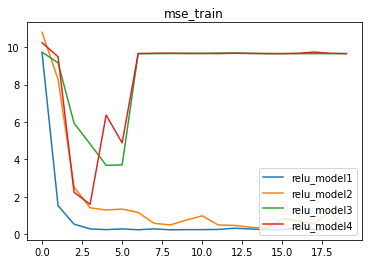

In [55]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i], label=name)
plt.legend(loc = 4)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

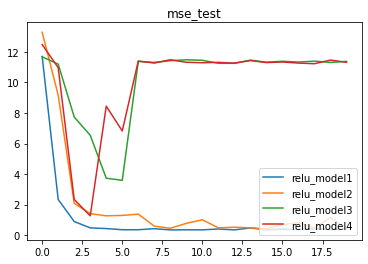

In [56]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i], label=name)
plt.legend(loc = 4)
plt.title('mse_test')

在堆叠ReLU激活函数的过程中，模型效果并没有朝向预想的方向发展，MSE不仅没有越来越低，model3和model4甚至出现了模型失效的情况

- 伴随模型复杂度增加，模型收敛速度变慢、收敛过程波动增加、甚至有可能出现模型失效的情况

> 此处ReLU激活函数叠加后出现的模型失效问题，也就是Dead ReLU Problem。

### 2.Sigmoid激活函数叠加

&emsp;&emsp;同样，我们再构建拥有两个隐藏层、三个隐藏层和四个隐藏层的神经网络。

In [58]:
class Sigmoid_class2(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4, out_features=1):       
        super(Sigmoid_class2, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_features) 
        
    def forward(self, x):                                    
        z1 = self.linear1(x)
        p1 = torch.sigmoid(z1)
        z2 = self.linear2(p1)
        p2 = torch.sigmoid(z2)
        out = self.linear3(p2)
        return out


class Sigmoid_class3(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4, n_hidden3=4, out_features=1):       
        super(Sigmoid_class3, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, n_hidden3)
        self.linear4 = nn.Linear(n_hidden3, out_features) 
        
    def forward(self, x):                                    
        z1 = self.linear1(x)
        p1 = torch.sigmoid(z1)
        z2 = self.linear2(p1)
        p2 = torch.sigmoid(z2)
        z3 = self.linear3(p2)
        p3 = torch.sigmoid(z3)
        out = self.linear4(p3)
        return out

    
class Sigmoid_class4(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4, n_hidden3=4, n_hidden4=4, out_features=1):       
        super(Sigmoid_class4, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, n_hidden3)
        self.linear4 = nn.Linear(n_hidden3, n_hidden4)
        self.linear5 = nn.Linear(n_hidden4, out_features) 
        
    def forward(self, x):                                    
        z1 = self.linear1(x)
        p1 = torch.sigmoid(z1)
        z2 = self.linear2(p1)
        p2 = torch.sigmoid(z2)
        z3 = self.linear3(p2)
        p3 = torch.sigmoid(z3)
        z4 = self.linear4(p3)
        p4 = torch.sigmoid(z4)
        out = self.linear5(p4)
        return out

In [60]:
#————————————————————————————测试模型效果————————————————————————————
# 创建随机数种子
torch.manual_seed(24)  

# 实例化模型
sigmoid_model1 = Sigmoid_class1()
sigmoid_model2 = Sigmoid_class2()
sigmoid_model3 = Sigmoid_class3()
sigmoid_model4 = Sigmoid_class4()

# 模型列表容器
model_l = [sigmoid_model1, sigmoid_model2, sigmoid_model3, sigmoid_model4]           
name_l = ['sigmoid_model1', 'sigmoid_model2', 'sigmoid_model3', 'sigmoid_model4']

# 核心参数
num_epochs = 50
lr = 0.03


train_l, test_l = model_comparison(model_l = model_l, 
                                   name_l = name_l, 
                                   train_data = train_loader,
                                   test_data = test_loader,
                                   num_epochs = num_epochs, 
                                   criterion = nn.MSELoss(), 
                                   optimizer = optim.SGD, 
                                   lr = lr, 
                                   cla = False, 
                                   eva = mse_cal)

Text(0.5, 1.0, 'mse_train')

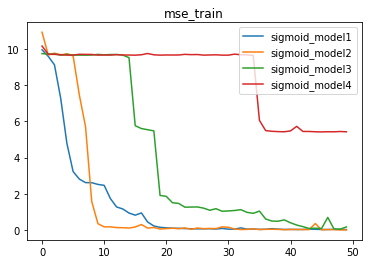

In [61]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

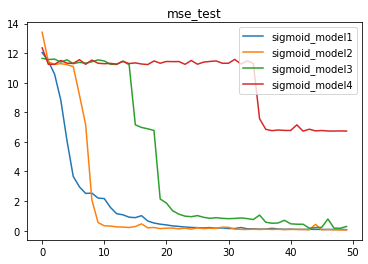

In [62]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test')

伴随模型复杂增加，模型效果没有提升，但收敛速度却下降的很严重，而model4更是没有收敛到其他几个模型的MSE，问题不小。

> 此处Sigmoid激活函数堆叠后出现的问题，本质上就是梯度消失所导致的问题。

### 3.tanh激活函数叠加

&emsp;&emsp;最后，我们再来看下tanh激活函数叠加后的模型效果

In [63]:
class tanh_class2(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4, out_features=1):       
        super(tanh_class2, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_features) 
        
    def forward(self, x):                                    
        z1 = self.linear1(x)
        p1 = torch.tanh(z1)
        z2 = self.linear2(p1)
        p2 = torch.tanh(z2)
        out = self.linear3(p2)
        return out

    
class tanh_class3(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4, n_hidden3=4, out_features=1):       
        super(tanh_class3, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, n_hidden3)
        self.linear4 = nn.Linear(n_hidden3, out_features) 
        
    def forward(self, x):                                    
        z1 = self.linear1(x)
        p1 = torch.tanh(z1)
        z2 = self.linear2(p1)
        p2 = torch.tanh(z2)
        z3 = self.linear3(p2)
        p3 = torch.tanh(z3)
        out = self.linear4(p3)
        return out

    
class tanh_class4(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4, n_hidden3=4, n_hidden4=4, out_features=1):       
        super(tanh_class4, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, n_hidden3)
        self.linear4 = nn.Linear(n_hidden3, n_hidden4)
        self.linear5 = nn.Linear(n_hidden4, out_features) 
        
    def forward(self, x):          
        z1 = self.linear1(x)
        p1 = torch.tanh(z1)
        z2 = self.linear2(p1)
        p2 = torch.tanh(z2)
        z3 = self.linear3(p2)
        p3 = torch.tanh(z3)
        z4 = self.linear4(p3)
        p4 = torch.tanh(z4)
        out = self.linear5(p4)
        return out

In [64]:
#————————————————————————————tahn训练模型————————————————————————————

# 创建随机数种子
torch.manual_seed(42)  

# 实例化模型
tanh_model1 = tanh_class1()
tanh_model2 = tanh_class2()
tanh_model3 = tanh_class3()
tanh_model4 = tanh_class4()

# 模型列表容器
model_l = [tanh_model1, tanh_model2, tanh_model3, tanh_model4]           
name_l = ['tanh_model1', 'tanh_model2', 'tanh_model3', 'tanh_model4']

# 核心参数
num_epochs = 50
lr = 0.03  

train_l, test_l = model_comparison(model_l = model_l, 
                                   name_l = name_l, 
                                   train_data = train_loader,
                                   test_data = test_loader,
                                   num_epochs = num_epochs, 
                                   criterion = nn.MSELoss(), 
                                   optimizer = optim.SGD, 
                                   lr = lr, 
                                   cla = False, 
                                   eva = mse_cal)

Text(0.5, 1.0, 'mse_train')

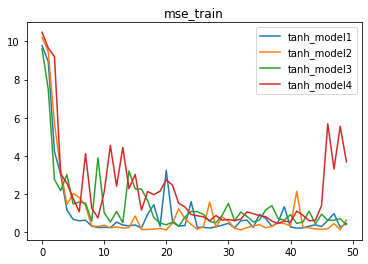

In [65]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

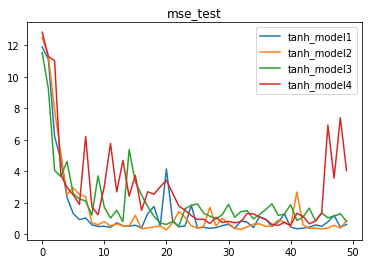

In [66]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test')

tanh激活函数叠加效果中规中矩，在model1到model2的过程效果明显向好，MSE基本一致、收敛速度基本一致、但收敛过程稳定性较好，也证明模型结果较为可信。

而model3、model4则表现出了和前面两种激活函数在叠加过程中所出现的类似的问题，当然对于tanh来说，最明显的问题是出现了剧烈波动，甚至出现了“跳跃点”。

> 此处tanh激活函数堆叠所导致的迭代过程剧烈波动的问题，也被称为迭代不平稳，需要优化迭代过程来解决。

## 五、神经网络结构选择策略

### 1.参数和超参数

神经网络的模型结构是影响建模结果至关重要的因素。但对于一个数据集，构建几层神经网络、每一层设置多少个神经元，却不是一个存在唯一最优解的参数。
- 首先根据经验设置模型结构、然后再根据实际建模效果不断调整的过程。

> 关于参数和超参数的说明：      
&emsp;&emsp;在机器学习中，参数其实分为两类，其一是参数，其二则是超参数，一个影响模型的变量是参数还是超参数，核心区别就在于这个**变量的取值能否通过一个严谨的数学过程求出**，如果可以，我们就称其为参数，如果不行，我们就称其为超参数。  



### 2.神经网络模型结构选择策略

**层数选择方面**   
- 三层以内：模型效果会随着层数增加而增加；
  
- 三层至六层：随着层数的增加，模型的稳定性迭代的稳定性会受到影响，并且这种影响是随着层数增加“指数级”增加的，此时我们就需要采用一些优化方法对输入数据、激活函数、损失函数和迭代过程进行优化，一般来说在六层以内的神经网络在通用的优化算法配合下，是能够收敛至一个较好的结果的；
- 六层以上：在模型超过六层之后，优化方法在一定程度上仍然能够辅助模型训练，但此时保障模型正常训练的更为核心的影响因素，就变成了数据量本身和算力。神经网络模型要迭代收敛至一个稳定的结果，所需的epoch是随着神经网络层数增加而增加的，也就是说神经网络模型越复杂，收敛所需迭代的轮数就越多，此时所需的算力也就越多。而另一方面，伴随着模型复杂度增加，训练所需的数据量也会增加，如果是复杂模型应用于小量样本数据，则极有可能会出现“过拟合”的问题从而影响模型的泛化能力。当然，伴随着模型复杂度提升、所需训练数据增加，对模型优化所采用的优化算法也会更加复杂。也就是说，六层以内神经网络应对六层以上的神经网络模型，我们需要更多的算力支持、更多的数据量、以及更加复杂的优化手段支持。

**每一层神经元个数选择方面：**
- 输入层的神经元个数就是特征个数，
- 输出层神经元个数，
  - 如果是回归类问题或者是逻辑回归解决二分类问题，输出层就只有一个神经元
  - 如果是多分类问题，输出层神经元个数就是类别总数。
- 隐藏层神经元个数，可以按照最多不超过输入特征的2-4倍进行设置
  - 当然默认连接方式是全连接，每一个隐藏层可以设置相同数量的神经元

&emsp;&emsp;其实对于神经元个数设置来说，后期是有调整空间的，哪怕模型创建过程神经元数量有些“饱和”，可以通过丢弃法（优化方法的一种）对隐藏层神经元个数和连接方式进行修改。

### 3.激活函数使用的单一性

&emsp;&emsp;同时，对于激活函数的交叉使用，**通常来说是不会出现多种激活函数应用于一个神经网络中**的情况的。

主要原因并不是因为模型效果就一定会变差，而是如果几种激活函数效果类似，那么交叉使用几种激活函数其实效果和使用一种激活函数区别不大，而如果几种激活函数效果差异非常明显，那么这几种激活函数的堆加就会使得模型变得非常不可控。

目前工业界针对激活函数的优化算法都是针对某一种激活函数来使用的，激活函数的交叉使用会令这些优化算法失效。

## 六、【加餐】损失函数的随机创建现象

&emsp;&emsp;接下来，我们通过手动创建一个实例，来观察在小批梯度下降过程中，损失函数是如何根据数据数据变化而变化的，这里既是作为本节内容的一个补充，同时也是指出一个常见的误区、以及解决一个常见的问题。

<center><img src="https://i.loli.net/2021/01/23/caNAtMFI5dqhfH6.jpg" alt="11" style="zoom:30%;" />

- 误区：损失函数从始至终都不变，梯度下降迭代过程就是“从山顶走到山脚”，一步步找到最小值；
- 问题：为何迭代过程中损失函数下降，但模型评估指标却出现波动。

我们通过手动实例进行说明。首先创建一组数据如下：

|x|y|
| :------: | :------: |
| 1 | 2 |
| 3 | 5 |
| 6 | 4 |
| 8 | 3 |

们使用$y=wx$方程对其进行拟合，并以SSE作为损失函数。假设我们使用小批量梯度下降，每次带入两条数据进行损失函数计算，第一次带入前两条数据、第二次带入后两条数据，则第一轮epoch的第一次迭代过程中损失函数如下：
$$ \begin{align} SSE_{(1)}
& = (2-1*w)^2 + (5-3*w)^2 \\
& = w^2-4w+4+9w^2-30w+25 \\
& = 10w^2-34w+29  \end{align} $$

据此可以算得当前梯度公式如下：
$ \begin{align} 
grad_{(1)}
& = \frac{\partial{SSE_{(1)}}}{\partial{(w)}}  \\
& = 20w-34 \\ \end{align} $


然后再进行迭代。然而再第一轮epoch的第二次迭代时，由于我们带入了另外两条数据，此时的损失函数就有所不同了：

$$ \begin{align} SSE_{(2)}
& = (4-6*w)^2 + (3-8*w)^2 \\
& = 36w^2-48w+16+64w^2-48w+9 \\
& = 100w^2-96w+25  \end{align} $$

对应的梯度计算公式也会有所不同
$ \begin{align} 
grad_{(2)}
& = \frac{\partial{SSE_{(1)}}}{\partial{(w)}}  \\
& = 200w-96 \\ \end{align} $

而此时如果我们以SSE作为模型评估指标，则模型评估指标其实是每一个“小批”数据对应损失函数之和：

$$ \begin{align} SSE
& = (2-1*w)^2 + (5-3*w)^2 + (4-6w)^2 + (3-8w)^2 \\
& = SSE_{(1)}+SSE_{(2)} \\
& = 110w^2-100w+54 \end{align} $$

迭代过程我们要求每一次迭代损失函数都降低，但通过观察上述过程不难发现，第一轮epoch迭代第一次时，$SSE_1$能够顺利降低，但$SSE_2$和$SSE$并不一定，同理，第一轮epoch迭代第二次时，$SSE_2$能够顺利降低，但$SSE_1$和$SSE$并不一定。

In [70]:
# SSE1损失函数计算函数
def loss_sse1(x):
    loss1 = 10 * x * x - 34 * x + 29
    return loss1

# SSE2损失函数计算函数
def loss_sse2(x):
    loss2 = 100 * x * x - 96 * x + 25
    return loss2

# SSE损失函数计算函数
def loss_sse(x):
    loss = 110 * x * x - 100 * x + 54
    return loss

# SSE1的梯度计算函数
def g1(x):
    grad1 = 20 * x - 34
    return grad1

# SSE2的梯度计算函数
def g2(x):
    grad2 = 200 * x - 96
    return grad2

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

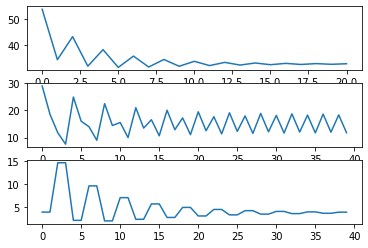

In [71]:
# 定义核心参数
w = 0                      # w的初始取值
lr = 0.01                  # 模型学习率
num_epochs = 20            # 迭代轮数

# 创建空列表容器
w_l = [0]                  # w迭代过程取值
loss_l = []                # 整体SSE取值
loss1_l = []               # SSE1取值
loss2_l = []               # SSE2取值


for i in range(num_epochs):
    loss_l.append(loss_sse(w))         # 每一轮迭代开始前计算整体SSE
    loss1_l.append(loss_sse1(w))       # 每一轮第一次迭代开始前计算SSE1
    w -= lr * g1(w)                    # 每一轮的第一次迭代
    w_l.append(w)                      # 每一轮第一次迭代后储存w
    loss1_l.append(loss_sse1(w))       # 每一轮第一次迭代后计算SSE1
    loss2_l.append(loss_sse2(w))       # 每一轮第二次迭代开始前计算SSE2
    w -= lr * g2(w)                    # 每一轮第二次迭代
    w_l.append(w)                      # 每一轮第二次迭代后储存w
    loss2_l.append(loss_sse2(w))       # 每一轮第二次迭代后计算SSE2

loss_l.append(loss_sse(w))             # 训练完成后存储最终w

# 绘图部分
# 查看整体SSE变化情况
plt.subplot(311)
plt.plot(list(range(num_epochs+1)), loss_l)
# 查看SSE1变化情况
plt.subplot(312)
plt.plot(list(range(num_epochs*2)), loss1_l)
# 查看SSE2变化情况
plt.subplot(313)
plt.plot(list(range(num_epochs*2)), loss2_l)

对于SSE1和SSE2来说都是降低的，但每一轮之间SSE1和SSE2都会出现波动，原因也是因为其他的损失函数计算出来的w不一定能有效帮助当前损失函数降低取值，当然整体SSE也是在波动中趋于稳定的。

> 关于小批量梯度下降算法捕捉局部规律的讨论:      
&emsp;&emsp;其实带入部分数据还是带入全部数据，其实都是相对的。在小批量梯度下降中，某一次迭代虽然是带入了全部训练数据集的一部分，但如果我们把这部分数据看成全部，就相当于是带入了全部数据进行训练。所有的训练都是为了捕捉规律，因此我们可以把某一次迭代看成是模型在捕捉这一部分数据的“全部规律”，但由于这部分数据只是所有训练数据的一部分，因此模型还只是捕捉了局部规律。从这个角度来说，小批量梯度下降是希望通过捕捉一个个“小批”数据的局部规律最终构成整个数据集的整体规律。

> 关于小批量梯度下降算法有效性的讨论:      
&emsp;&emsp;而为何通过捕捉局部规律最后能够更好的把握整体规律呢？从实际运算结果来看是因为小批量梯度下降能够跨越局部最小值点，而根本原因则是对于某些“小批”数据来说，由于局部规律和整体规律存在差异性，整体的局部最小值点对于当前“小批”数据来说根本就不是局部最小值点（毕竟不同数据的损失函数不同），因此带入该“小批”数据时候就有可能直接跨越该点，也就是说，小批量梯度下降无法跨越小批数据对应的损失函数的最小值点，但在下降的过程中却有可能偶然帮助整体损失函数跨越最小值点，这就是借助随机性解决问题的典型。